**1. Why is your proposal important in today's world? How predicting a disease accurately can improve medical treatment?**


* **Answere** -  machine learning in the context of COVID-19 is essential for informing public health responses, optimizing healthcare delivery, and ultimately saving lives. By leveraging ML techniques, we can gain valuable insights into the dynamics of the pandemic, develop effective strategies for prevention and control, and mitigate the impact of COVID-19 on individuals and communities worldwide.

*  **it can improve medical treatment**:

* **Early Detection** - Accurate disease prediction allows for the early detection of illnesses before symptoms appear. This early detection enables healthcare providers to intervene at the earliest stages of the disease, when treatments may be more effective and outcomes are generally better.
* **Preventive Measures** - Disease prediction models can identify individuals who are at high risk of developing certain conditions based on factors such as genetic predisposition, lifestyle choices, and environmental exposures. With this information, healthcare providers can recommend preventive measures such as lifestyle modifications, screenings, vaccinations, and medications to reduce the risk of disease onset or progression.
*   **Vaccine Development and Distribution**:-ML plays a crucial role in vaccine development by predicting antigen structures, optimizing vaccine formulations, and identifying suitable candidate vaccines for clinical trials.


**2. how is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

**Answere**- prediction can have a significant impact on the medical field by enhancing effective screening and reducing the healthcare burden.

**Targeted Screening**: Disease prediction models can identify individuals at high risk of developing certain conditions based on their genetic predisposition, lifestyle factors, and other risk factors. By targeting screening efforts toward high-risk populations, healthcare providers can detect diseases at earlier stages when treatment is more effective, leading to better outcomes and reduced healthcare costs.


**focusing resources on high-risk populations**

**Reduce hospitalizations, and improve patients' quality of life.**

**Early detection and prevention of diseases through effective screening programs result in cost savings for healthcare systems.**


















#**Data Analysis Approach**
---


**What approach are you going to take in order to prove or disprove your hypothesis**
*   Selection of appropriate ML model based on the hypothesis and the nature of the data. Train the selected model using the training data and tune hyperparameters as needed using techniques such as cross-validation or grid search

**Question- What future engineering techniques will be relevant to your project**

**Replace Values in Columns:**

**1.** Replace "None" with False in columns 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', and 'Headache'.

**2.**Replace "TRUE" with True and "FALSE" with False in the 'Test' column.

**3.**Replace "None" with "No" in the 'Age_60_above' column.

**4.**Replace "None" with "female" in the 'Sex' column.

**5.**Change DataType and Split 'Test_Date' Column:

**6.**Convert the 'Test_Date' column from object to DateTime datatype.

**7.**Split the 'Test_Date' column into 'Year', 'Month', and 'Day' columns.

**Apply Label Encoder:**

Use Label Encoder to encode categorical data in the dataset. This step is necessary if there are other categorical columns in the dataset that need encoding.

**Question-Please justify your data analysis approach.**

Standardizing boolean values ('Test') ensures consistency in representing True/False values across the dataset. Similarly, replacing "None" with "No" in the 'Age_60_above' column and "None" with "female" in the 'Sex' column improves data consistency and clarity.

Applying Label Encoder to encode categorical data in the dataset is a common preprocessing step in machine learning tasks. It converts categorical variables into numerical format, which is necessary for training machine learning models that require numerical input data.

**My hypothesis states that there is no relationship between gender and the corona test result (positive or negative). I will conduct the Chi-Square test to determine if there is an association between them.**



**AQuestion- Identify important patterns in your data using the EDA approach to justify your findings.**

* Handle missing values, outliers, and skewness in the data.

* Normalize or standardize numerical variables if necessary.

* Encode categorical variables using one-hot encoding or label encoding.

* Conducted hypothesis  chi-square test to compare groups and determine if there are statistically significant differences.

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

In [34]:

df =  pd.read_csv("/content/drive/MyDrive/CAP 2 Dataset/corona_tested_006.csv")

<ipython-input-34-3457ec4eacb1>:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv("/content/drive/MyDrive/CAP 2 Dataset/corona_tested_006.csv")


In [35]:
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [36]:
df.isnull().sum()

,0
Ind_ID,0
Test_date,0
Cough_symptoms,252
Fever,252
Sore_throat,1
Shortness_of_breath,1
Headache,1
Corona,0
Age_60_above,127320
Sex,19563


In [37]:
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Ind_ID,0,0.000000
Test_date,0,0.000000
Cough_symptoms,252,0.090372
Fever,252,0.090372
Sore_throat,1,0.000359
Shortness_of_breath,1,0.000359
Headache,1,0.000359
Corona,0,0.000000
Age_60_above,127320,45.659284
Sex,19563,7.015650


In [38]:
for i in df.columns:
  print(df[i].value_counts(),'\n\n')

Ind_ID
1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: count, Length: 278848, dtype: int64 


Test_date
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-

In this data there is no null values but there is "None" data is present in
Cough_symptoms, Cough_symptoms,Fever,sore_throat, Shortness_of_breath.Headach,Sex.  So the let the value of 'None' is change to be in False


In [39]:
df2 =df.copy()    # Making copy of the data

In [40]:

df2['Cough_symptoms'].replace('TRUE',True, regex=True, inplace=True)
df2['Cough_symptoms'].replace('FALSE',False, regex=True, inplace=True)
df2['Cough_symptoms'].value_counts()

,count
Cough_symptoms,
False,236368
True,42228


In [41]:
df2['Fever'].replace('None',False, regex=True, inplace=True)
df2['Fever'].replace('TRUE',True, regex=True, inplace=True)
df2['Fever'].replace('FALSE',False, regex=True, inplace=True)
df2['Fever'].value_counts()


,count
Fever,
False,256844
True,21752


In [42]:
df2['Sore_throat'].replace('None',False, regex=True, inplace=True)
df2['Sore_throat'].replace('TRUE',True, regex=True, inplace=True)
df2['Sore_throat'].replace('FALSE',False, regex=True, inplace=True)
df2['Sore_throat'].value_counts()

,count
Sore_throat,
False,276921
True,1926


In [43]:
df2['Shortness_of_breath'].replace('None',False, regex=True, inplace=True)
df2['Shortness_of_breath'].replace('TRUE',True, regex=True, inplace=True)
df2['Shortness_of_breath'].replace('FALSE',False, regex=True, inplace=True)
df2['Shortness_of_breath'].value_counts()

,count
Shortness_of_breath,
False,277270
True,1577


<ipython-input-44-6f53a19e1877>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Shortness_of_breath',data=df2, palette="Set1")


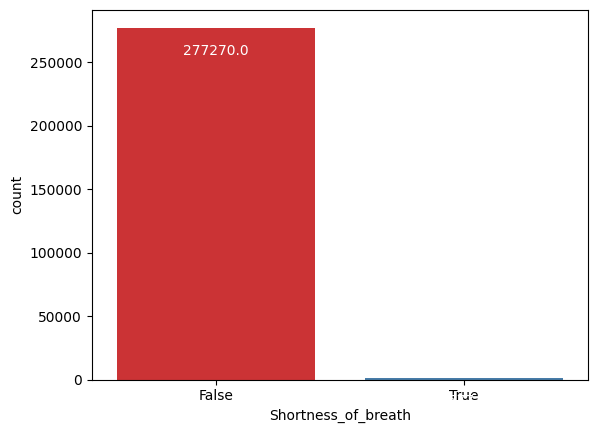

In [44]:
ax = sns.countplot(x='Shortness_of_breath',data=df2, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [45]:
df2['Headache'].replace('None',False, regex=True, inplace=True)
df2['Headache'].replace('TRUE',True, regex=True, inplace=True)
df2['Headache'].replace('FALSE',False, regex=True, inplace=True)
df2['Headache'].value_counts()

,count
Headache,
False,276433
True,2414


In [46]:
df2['Age_60_above'].replace('None','No', regex=True, inplace=True)
df2['Age_60_above'].value_counts()

,count
Age_60_above,
No,125703
Yes,25825


In [47]:
df2['Corona'].replace('other','negative', regex=True, inplace=True)


In [48]:
df2['Corona'].value_counts()

,count
Corona,
negative,264119
positive,14729


In [49]:
# Replace the None value of sex column with there mode
df2['Sex'].replace('None', 'female', regex=True, inplace=True)


<ipython-input-50-be98a3b473fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Age_60_above',data=df2, palette="Set2")


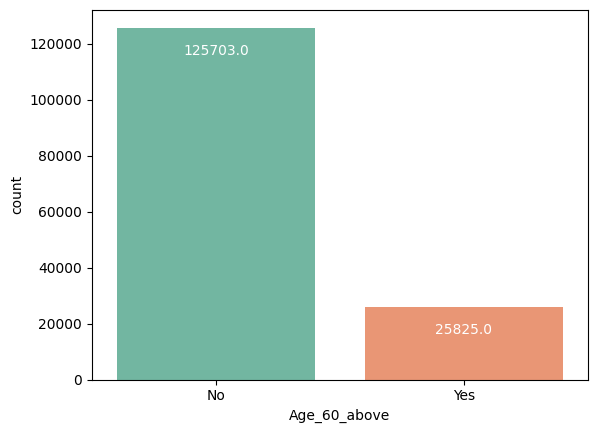

In [50]:
ax = sns.countplot(x='Age_60_above',data=df2, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

<ipython-input-51-09774e883991>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex',data=df2, palette="PuRd")


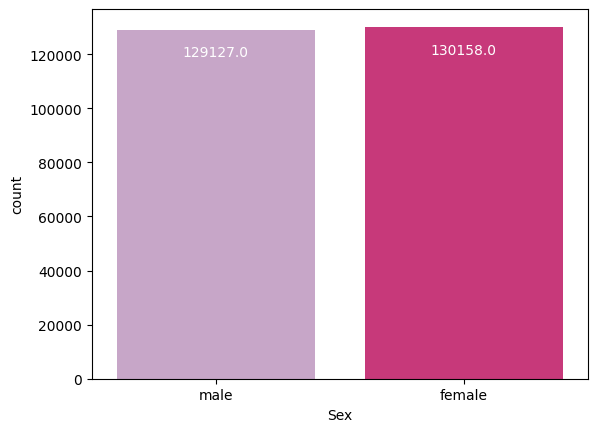

In [51]:
ax = sns.countplot(x='Sex',data=df2, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [52]:
df2['Test_date'] = pd.to_datetime(df2['Test_date'], dayfirst=True)


In [53]:
df2['Year'] = df2['Test_date'].dt.year
df2['Month'] = df2['Test_date'].dt.month
df2['Day'] = df2['Test_date'].dt.day

In [54]:
df3 = df2.copy()

In [55]:
df3    # df3 will be used in OneHotEncoding
df4=df3.copy()  # df4 will be used for excel file

In [56]:
df3_test=pd.crosstab(df3['Sex'],df3['Corona'])
df3_test

Corona,negative,positive
Sex,,
female,124117,6041
male,121608,7519


In [57]:
import scipy.stats as stats
p_val_test=stats.chi2_contingency(df3_test)
p_val_test

Chi2ContingencyResult(statistic=182.3809994963408, pvalue=1.464097387941718e-41, dof=1, expected_freq=array([[123351.04055383,   6806.95944617],
       [122373.95944617,   6753.04055383]]))

In [58]:
p_val = p_val_test[1]

In [59]:
float(p_val)

1.464097387941718e-41

The p-value is extremely small (2.160497487725928e-32), providing strong evidence against the null hypothesis of independence. Therefore, we would reject the null hypothesis and conclude that there is a statistically significant association between the two categorical variables.

In [60]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278596 non-null  object        
 3   Fever                278596 non-null  object        
 4   Sore_throat          278847 non-null  object        
 5   Shortness_of_breath  278847 non-null  object        
 6   Headache             278847 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         151528 non-null  object        
 9   Sex                  259285 non-null  object        
 10  Known_contact        278848 non-null  object        
 11  Year                 278848 non-null  int32         
 12  Month                278848 non-null  int32         
 13  Day           

In [61]:
df3.shape

(278848, 14)

In [62]:
df3.isnull().sum()

,0
Ind_ID,0
Test_date,0
Cough_symptoms,252
Fever,252
Sore_throat,1
Shortness_of_breath,1
Headache,1
Corona,0
Age_60_above,127320
Sex,19563


In [74]:
le = LabelEncoder()

In [75]:
df3['Cough_symptoms']=le.fit_transform(df3['Cough_symptoms'])
df3['Fever']=le.fit_transform(df3['Fever'])
df3['Sore_throat']=le.fit_transform(df3['Sore_throat'])
df3['Shortness_of_breath']=le.fit_transform(df3['Shortness_of_breath'])
df3['Headache']=le.fit_transform(df3['Headache'])
df3['Corona']=le.fit_transform(df3['Corona'])
df3['Age_60_above']=le.fit_transform(df3['Age_60_above'])
df3['Sex']=le.fit_transform(df3['Sex'])
df3['Known_contact']=le.fit_transform(df3['Known_contact'])

In [76]:
df3

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,Year,Month,Day
0,1,2020-03-11,1,0,1,0,0,0,2,2,0,2020,3,11
1,2,2020-03-11,0,1,0,0,0,1,2,2,0,2020,3,11
2,3,2020-03-11,0,1,0,0,0,1,2,2,0,2020,3,11
3,4,2020-03-11,1,0,0,0,0,0,2,2,0,2020,3,11
4,5,2020-03-11,1,0,0,0,0,0,2,2,1,2020,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,0,0,0,0,0,1,2,1,2,2020,4,30
278844,278845,2020-04-30,0,0,0,0,0,0,2,0,2,2020,4,30
278845,278846,2020-04-30,0,0,0,0,0,0,2,1,2,2020,4,30
278846,278847,2020-04-30,0,0,0,0,0,0,2,1,2,2020,4,30


**Separate Dependent and independent variable**

In [78]:
x = df3[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact', 'Year', 'Month', 'Day']]
y = df3[['Corona']]

**Next step is to divide the Training and Testing data**

In [79]:
from sklearn.model_selection import train_test_split


In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, shuffle = False )

#**Machine Learning Approach**

* Decision Tree
* KNN( k-Nearest Neighbors algorithm}
* Random Forest Classifier
* Logistic Regression

**Please justify the most appropriate model.**


Among the three models, Decision is the most suitable model as it achieves the highest accuracy of 98.75% and the lowest log loss of 0.45.

**Please perform necessary steps required to improve the accuracy of your model.**

* LogisticRegression(C=1000, penalty='l2', solver='lbfgs', max_iter=1000)
*  DecisionTreeClassifier(criterion="entropy", max_depth = 3)
* RandomForestClassifier(criterion= 'gini',random_state= 0)



#**Importing Logistic Regression**

In [81]:
# Define the hyperparameter grid with different ranges or values for C and penalty types
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # L1 (lasso) and L2 (ridge) penalties

# Create a logistic regression model
lr = LogisticRegression()

# Perform grid search cross-validation
lr_cv = GridSearchCV(lr, grid, cv=10)
lr_cv.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [82]:
print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}


In [85]:
lr_model = LogisticRegression(C=100, penalty='l2', solver='lbfgs', max_iter=1000)
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, max_iter=1000)

In [87]:
lr_y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, lr_y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Confusion Matrix:\n', confusion_matrix(y_test,lr_y_pred))
print('Classification Report:\n', classification_report(y_test,lr_y_pred))

Accuracy: 97.96%
Confusion Matrix:
 [[54632     7]
 [ 1129     2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     54639
           1       0.22      0.00      0.00      1131

    accuracy                           0.98     55770
   macro avg       0.60      0.50      0.50     55770
weighted avg       0.96      0.98      0.97     55770



In [88]:
log_loss_value = log_loss(y_test, lr_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)



Log Loss:  0.7341866639777138


**KNN(K Nearest Neighbors)**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [90]:
knn.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [91]:
knn_y_predict= knn.predict(x_test)

In [92]:
KNN_Accuracy = accuracy_score(y_test, knn_y_predict)                              # KNN Accuracy Percentage
print('Accuracy: {:.2f}%'.format(KNN_Accuracy * 100))

Accuracy: 97.30%


In [93]:
log_loss_value = log_loss(y_test, knn_y_predict, labels=[0,1])
print('Log Loss: ', log_loss_value)

Log Loss:  0.9739606537098721


**Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [95]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [96]:
dt_y_pred=classifier.predict(x_test)

In [97]:
log_loss_value = log_loss(y_test, dt_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)


Log Loss:  0.45175746313417436


In [98]:
DT_Accuracy = accuracy_score(y_test, dt_y_pred)                                 # Decision Tree  Accuracy Percentage
print('Accuracy: {:.2f}%'.format(DT_Accuracy * 100))

Accuracy: 98.75%


**Random Forest Classifier**

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(criterion= 'gini',random_state= 0)

In [100]:
rfc.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [101]:
rfc_y_pred=rfc.predict(x_test)
rfc_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
log_loss_value = log_loss(y_test, rfc_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

Log Loss:  0.4524037542116195


In [103]:
RFC_Accuracy = accuracy_score(y_test, rfc_y_pred)                        # RandomForestClassifire Accuracy Percentage
print('Accuracy: {:.2f}%'.format(RFC_Accuracy * 100))

Accuracy: 98.74%


Log Loss:  0.4524037542116195


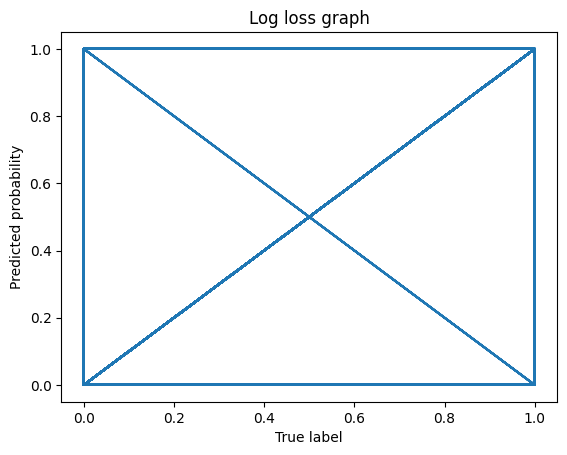

In [105]:
log_loss_value = log_loss(y_test, rfc_y_pred, labels=[0,1])
print('Log Loss: ', log_loss_value)

# Plot the log loss graph
plt.plot(y_test, rfc_y_pred)
plt.xlabel('True label')
plt.ylabel('Predicted probability')
plt.title('Log loss graph')
plt.show()

In [106]:
# df4.to_csv('/content/drive/My Drive/covid_data.csv', index=False)  download the file to wrk in sql